# Your first Python notebook
For the first part of the series, we're going to look at some expected goals data to see if we can identify which teams have been over or under-performing xG. The data we will be using is for the first 8 games of the 2018-2019 EPL season; for now we will be using xG numbers from understat.com, but later in the series I will show you how you can create your own xG models. Getting data in the first place can be tricky at the best of times, so I have provided a csv file containing the data that can be downloaded from my Github account here. This exercise will teach you the basics of the pandas library for data-frames, as well as some basic plotting with matplotlib and seaborn.

## Reading the data
First, we need to import the pandas library and read the data. By convention, the pandas library is imported as 'pd', so any pandas methods (e.g. 'read_csv()') can be called via the pd prefix. However, if you fancy doing the whole 'Hello, World!' thing before that, go ahead! To run a code cell in a Jupyter notebook, either press the triangular 'play' icon or press 'shift + enter' on your keyboard.

In [38]:
# Optional hello world (https://en.wikipedia.org/wiki/%22Hello,_World!%22_program)
print('Hello, World!')

Hello, World!


In [47]:
# Import the pandas library
import pandas as pd

# Read the data from a csv file and save it as a pandas dataframe named 'xg_data'
# Replace the file path with the location on your computer where the csv file is saved (in my case it's in D:/Tom/Downloads/)
xg_data = pd.read_csv('D:/Tom/Downloads/epl_xg.csv')

# Take a look at the data
xg_data

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73
2,Brighton,8,9,13,9.49,14.71,6.44,12.43
3,Burnley,8,10,12,7.69,14.11,7.69,13.35
4,Cardiff,8,4,17,7.44,13.68,7.44,11.40
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59
6,Crystal Palace,8,5,9,7.02,11.56,7.02,9.28
7,Everton,8,13,12,9.52,9.76,8.76,9.00
8,Fulham,8,9,21,9.41,18.00,9.41,15.71
9,Huddersfield,8,4,17,4.75,13.26,4.75,11.74


Right now the data looks pretty much how it would do in a spreadsheet, with the exception of the numbered 'index' column on the far left. With a small dataset like this we can see every row pretty easily, but with larger datasets you are likely to want to use the head and tail methods to get an idea of what the data looks like:

In [48]:
# Show the first 3 rows of the data
xg_data.head(3)

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73
2,Brighton,8,9,13,9.49,14.71,6.44,12.43


In [49]:
# Show the last 7 rows of the data
xg_data.tail(7)

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA
13,Manchester United,8,13,14,12.83,10.98,10.54,10.22
14,Newcastle,8,6,13,5.98,12.86,5.22,11.34
15,Southampton,8,6,14,10.61,14.02,9.09,13.26
16,Tottenham,8,15,7,14.79,9.66,13.27,9.66
17,Watford,8,11,12,10.55,11.01,10.55,10.25
18,West Ham,8,8,13,8.73,13.32,7.97,13.32
19,Wolverhampton Wanderers,8,9,6,11.06,6.15,11.06,6.15


## Filtering and summarising
You can also filter and summarise the data using more specific queries:

In [50]:
# Show the data for Leicester (note that 'is equal to' is written as '==' instead of '=')
# The code below essentially reads as 'show the xg_data dataframe where the 'Team' column is equal to 'Leicester'
# Because Leicester is a string, you need to write it using either single or double quotes
xg_data[xg_data['Team'] == 'Leicester']

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA
10,Leicester,8,14,12,9.14,8.58,7.62,7.05


In [51]:
# Filter the rows where goals scored is greater than or equal to 15, and save the result in a new dataframe
# Note that in this case because 15 is an integer, we don't need to use quotes
# For more information about data types, see https://realpython.com/python-data-types/
high_scorers = xg_data[xg_data['G'] >= 15]
high_scorers

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59
11,Liverpool,8,15,3,16.66,5.90,15.90,5.14
12,Manchester City,8,21,3,22.49,4.00,21.72,4.00
16,Tottenham,8,15,7,14.79,9.66,13.27,9.66


In [52]:
# Print a list of the teams that have scored at least 15 goals
print(list(high_scorers['Team']))

['Arsenal', 'Bournemouth', 'Chelsea', 'Liverpool', 'Manchester City', 'Tottenham']


In [53]:
# Show some summary statistics for each column in the original dataframe
xg_data.describe()

,Games,G,GA,xG,xGA,NPxG,NPxGA
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,8.0,11.250000,11.250000,11.018500,11.017500,10.028500,10.028500
std,0.0,5.087394,4.677775,4.291344,3.399627,3.960802,3.000714
min,8.0,4.000000,3.000000,4.750000,4.000000,4.750000,4.000000
25%,8.0,7.500000,8.500000,8.470000,9.085000,7.575000,8.375000
50%,8.0,10.500000,12.000000,9.965000,10.995000,9.250000,10.235000
75%,8.0,15.000000,13.250000,13.320000,13.410000,11.362500,11.912500
max,8.0,21.000000,21.000000,22.490000,18.000000,21.720000,15.710000


## Adding columns
It's likely that you're going to want to add extra columns to your data containing additional information. Let's add columns for goal difference, expected goal difference and non-penalty expected goal difference, and then sort the data by NPxGD:

In [15]:
# Add new columns for goal difference, expected goal difference and non-penalty expected goal difference
xg_data['GD'] = xg_data['G'] - xg_data['GA']
xg_data['xGD'] = xg_data['xG'] - xg_data['xGA']
xg_data['NPxGD'] = xg_data['NPxG'] - xg_data['NPxGA']

# Order the teams by NPxGD to help give an idea of who the good and bad teams are currently
xg_data = xg_data.sort_values(by=['NPxGD'], ascending=False)
xg_data

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA,GD,xGD,NPxGD
12,Manchester City,8,21,3,22.49,4.00,21.72,4.00,18,18.49,17.72
11,Liverpool,8,15,3,16.66,5.90,15.90,5.14,12,10.76,10.76
19,Wolverhampton Wanderers,8,9,6,11.06,6.15,11.06,6.15,3,4.91,4.91
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59,13,7.13,4.85
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73,4,6.83,4.54
16,Tottenham,8,15,7,14.79,9.66,13.27,9.66,8,5.13,3.61
10,Leicester,8,14,12,9.14,8.58,7.62,7.05,2,0.56,0.57
13,Manchester United,8,13,14,12.83,10.98,10.54,10.22,-1,1.85,0.32
17,Watford,8,11,12,10.55,11.01,10.55,10.25,-1,-0.46,0.30
7,Everton,8,13,12,9.52,9.76,8.76,9.00,1,-0.24,-0.24


Manchester City and Liverpool unsurprisingly lead the way so far, with Wolves and Bournemouth keeping pace with Chelsea and Spurs in the early going. The teams at the bottom of this dataframe have been poor, but there are a couple of teams in the middle that stand out for different reasons. Let's take a look at who has been over or under-performing xG to make it easier to spot these teams.

## Plotting
To get a much clearer picture of what the data is telling us, it's a good idea to generate a plot or two. In this case we will create a horizontal bar plot (barh) using matplotlib to look at goal difference vs expected goal difference:

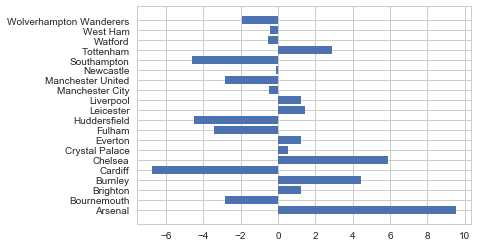

In [41]:
# Take a look at who has been overperforming or underperforming so far
xg_data['GD_vs_xGD'] = xg_data['GD'] - xg_data['xGD']
xg_data = xg_data.sort_values(by=['GD_vs_xGD'], ascending=False)

# Import the matplotlib library to use for plotting
from matplotlib import pyplot as plt

# Create a horizontal bar chart to help visualise the teams that have been overperforming or underperforming in terms of GD vs xGD
plt.barh(xg_data['Team'], xg_data['GD_vs_xGD'])

# Show the plot
plt.show()

The plot shows that Arsenal have been significantly over-performing in terms of xGD, whereas Cardiff have been under-performing. However, this isn't exactly a very good looking plot to say the least... Whilst Arsenal and Cardiff clearly stand out, it's hard to make comparisons between most of the other teams due to the ordering, and it's also quite small. Fortunately there is a different plotting library, seaborn, which allows us to easily create much more aesthetically pleasing plots.

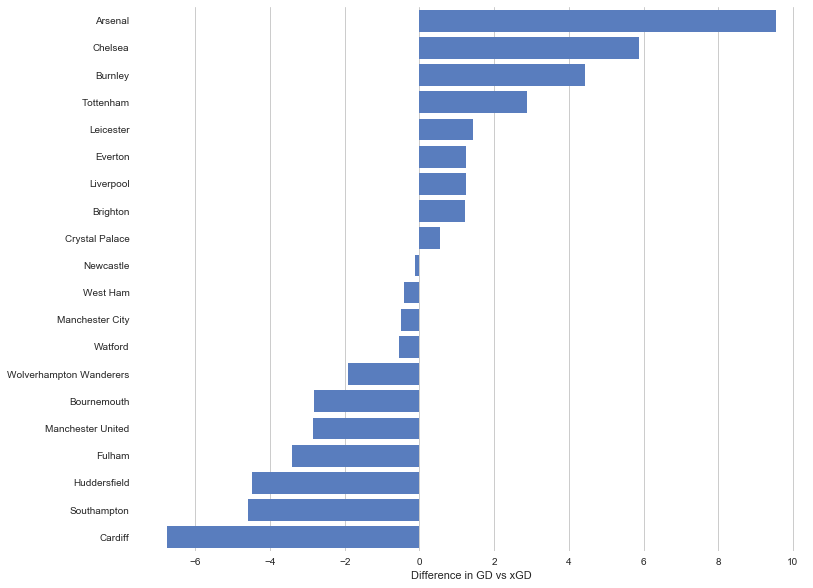

In [45]:
# Import seaborn to help create more visually appealing plots; see https://seaborn.pydata.org/introduction.html#introduction for more information
import seaborn as sns

# Set the plot style and colour palette to use (remember dodgy spelling if you're from the UK!)
sns.set(style='whitegrid')
sns.set_color_codes('muted')

# Initialize the matplotlib figure (f) and axes (ax), and set width and height of the plot
f, ax = plt.subplots(figsize=(12, 10))

# Create the plot, choosing the variables for each axis, the data source and the colour (b = blue)
sns.barplot(x='GD_vs_xGD', y='Team', data=xg_data, color='b')

# Rename the axes, setting y axis label to be blank
ax.set(ylabel='', xlabel='Difference in GD vs xGD')

# Remove the borders from the plot
sns.despine(left=True, bottom=True)

Much better! xG isn't perfect, but based on this graph it also looks like Chelsea and of course Burnley have been fortunate so far, whereas Southampton and Huddersfield have perhaps been a bit unlucky. Newcastle fans probably won't be pleased to see that their goal difference is pretty much bang on with expected, although they have had a very tough schedule to begin the season. Feel free to continue playing around with the data on your own to see what other interesting bits of information you can find (e.g. are Arsenal running good in attack, defense, or both?).

In [ ]:
# YOUR CODE HERE!